## Take Home Challenge #1

### Part 1: Exploratory Data Analysis

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import json
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
cd downloads/ultimate_challenge

/Users/kellipeluso/Downloads/ultimate_challenge


In [3]:
#read json file into pandas df
df = pd.read_json("logins.json")
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
#resample logins to 15 minute intervals
df_log = df.resample("15min", on="login_time").count()
df_log.index.name = "timestamp"
df_log.reset_index(inplace=True)
df_log.rename({"login_time":"logins"}, axis=1, inplace=True)
df_log.head()

,timestamp,logins
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [6]:
#use datetime functions to break down timestamp further
df_log['day'] = df_log['timestamp'].dt.day_name()
df_log['hour'] = df_log['timestamp'].dt.hour
df_log['month'] = df_log['timestamp'].dt.month_name()
df_log['year'] = df_log['timestamp'].dt.year
df_log.head()

,timestamp,logins,day,hour,month,year
0,1970-01-01 20:00:00,2,Thursday,20,January,1970
1,1970-01-01 20:15:00,6,Thursday,20,January,1970
2,1970-01-01 20:30:00,9,Thursday,20,January,1970
3,1970-01-01 20:45:00,7,Thursday,20,January,1970
4,1970-01-01 21:00:00,1,Thursday,21,January,1970


In [7]:
#total logins per year
df_year = df_log.groupby("year").sum()[["logins"]]
df_year["yearly_mean"] = df_log.groupby("year").mean()[["logins"]]
display(df_year)

,logins,yearly_mean
year,,
1970,93142,9.515938


In [8]:
#total logins per month
df_month = df_log.groupby("month").sum()[["logins"]]
df_month["monthly_mean"] = df_log.groupby("month").mean()[["logins"]]
display(df_month)

,logins,monthly_mean
month,,
April,13507,10.999186
February,24673,9.178943
January,21239,7.333909
March,33723,11.331653


In [9]:
#total logins per day of week
df_day = df_log.groupby("day").sum()[["logins"]]
df_day["daily_mean"] = df_log.groupby("day").mean()[["logins"]]
display(df_day)

,logins,daily_mean
day,,
Friday,15208,10.561111
Monday,8823,6.213380
Saturday,19377,13.456250
Sunday,18167,12.615972
Thursday,11960,8.794118
Tuesday,9268,6.895833
Wednesday,10339,7.692708


In [10]:
#total logins per hour
df_hour = df_log.groupby("hour").sum()[["logins"]]
df_hour["hourly_mean"] = df_log.groupby("hour").mean()[["logins"]]
display(df_hour)

,logins,hourly_mean
hour,,
0,5993,14.688725
1,6317,15.482843
2,5800,14.215686
3,4831,11.840686
4,5034,12.338235
5,2945,7.218137
6,1138,2.789216
7,815,1.997549
8,818,2.004902


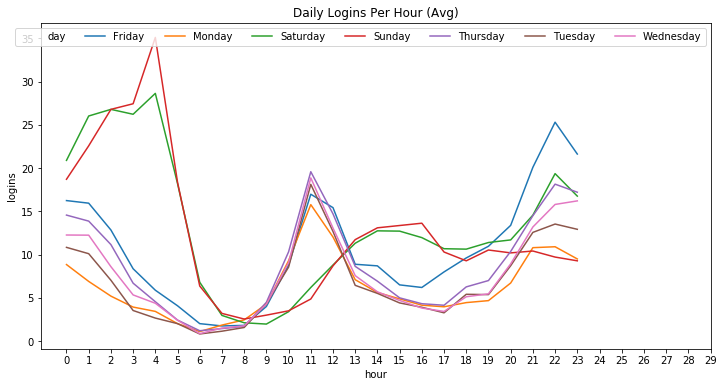

In [11]:
#login visuals
#create datetime index and get mean daily logins per hour & plot
df_hd = df_log.groupby(['hour','day']).mean().reset_index()

f, axes = plt.subplots(figsize=(12,6))
ax = sns.lineplot(x="hour", y="logins", data=df_hd, hue="day")
ax.legend(loc="upper right", ncol=8)
ax.set(title="Daily Logins Per Hour (Avg)")
plt.xticks(range(0,30))

#display plot
plt.show()

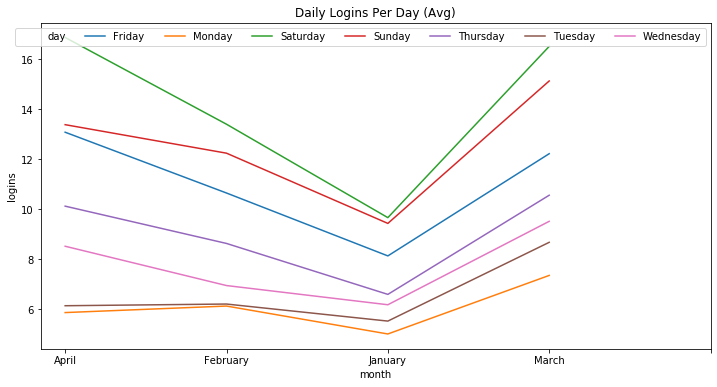

In [12]:
#create datetime index and get mean logins per day per month
df_dm = df_log.groupby(['day','month']).mean().reset_index()

f, axes = plt.subplots(figsize=(12,6))
ax = sns.lineplot(x="month", y="logins", data=df_dm, hue="day")
ax.legend(loc="upper right", ncol=8)
ax.set(title="Daily Logins Per Day (Avg)")
plt.xticks(range(0,5))

#display plot
plt.show()

### Part 2: Experiment and Metrics Design

1. Key measures of success for this experiment would be an increased ridership within each city based off of an increase in logins as ride partners are crossing the toll into the city which they typically would not. When considering the impact on business, Ultimate may consider how many fees they are paying in tolls to both cities and whether those costs offset the profits from the rides themselves. 
2. (A) In order to test the effectiveness of this proposed change, we could put into place an A/B test. In doing so we would split our drivers into two groups. One group would be our control group, that continues their normal driving patterns NOT crossing the toll bridge. The other group would include drivers from both cities, who are now crossing the toll bridge and being reimbursed for their toll fee. 
2. (B) The null hypothesis for this experiment would be that the proposed toll reimbursements do not bring any change in ridership to Ultimate, with the alternative hypothesis being that the proposed toll reimbursements will bring significant change to ridership. This could be tested by the significance of the p value.
2. (C) The results would be interpreted based upon the significance of the p value. If we found that there was a significant increase in ridership for group B (operating in both cities) then this is a plan that could be rolled out across Ultimate. If there was a notable decrease in ridership of group B, and an increase in group A, then additional experiments would need to be made to understand how to better implement ride partners across both cities.



### Part 3: Predictive Modeling

In [13]:
ls

logins.json                          ultimate_data_science_challenge.pdf
ultimate_data_challenge.json


In [14]:
#read json file
open_file = open('ultimate_data_challenge.json', 'r')
data = json.load(open_file)
df = pd.DataFrame(data)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [16]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [17]:
#drop null values 
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41445 entries, 0 to 41444
Data columns (total 12 columns):
city                      41445 non-null object
trips_in_first_30_days    41445 non-null int64
signup_date               41445 non-null object
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
last_trip_date            41445 non-null object
phone                     41445 non-null object
surge_pct                 41445 non-null float64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.5+ MB


In [18]:
#summary stats
df['city'].value_counts()

Winterfell        19161
Astapor           13509
King's Landing     8775
Name: city, dtype: int64

In [19]:
df['phone'].value_counts()

iPhone     29352
Android    12093
Name: phone, dtype: int64

In [20]:
df['ultimate_black_user'].value_counts()

False    25526
True     15919
Name: ultimate_black_user, dtype: int64

In [21]:
#ultimate black user percentage of all users
ultimate_count = len(df[df["ultimate_black_user"] == 1])
ultimate_pct = ultimate_count/len(df) * 100
print("Percentage of Ultimate Black Users: ", ultimate_pct)

Percentage of Ultimate Black Users:  38.40994088551092


In [22]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [23]:
# sort last trip
last_trip_sorted = df['last_trip_date'].sort_values(axis=0).reset_index(drop=True)
#create active column
d1 = dt(2014,6,1)
d2 = dt(2014,6,30)
active = []
for i in df['last_trip_date']:
    if i > d1 and i < d2:
        active.append(1)
    else:
        active.append(0)
        
#add column
df['active'] = active

#total number of active users
active_total = df['active'].sum()
print('Total retained users: ', active_total)
print('Percentage of retained users: ' +str(active_total / len (df['active'])*100))

Total retained users:  14717
Percentage of retained users: 35.50971166606346


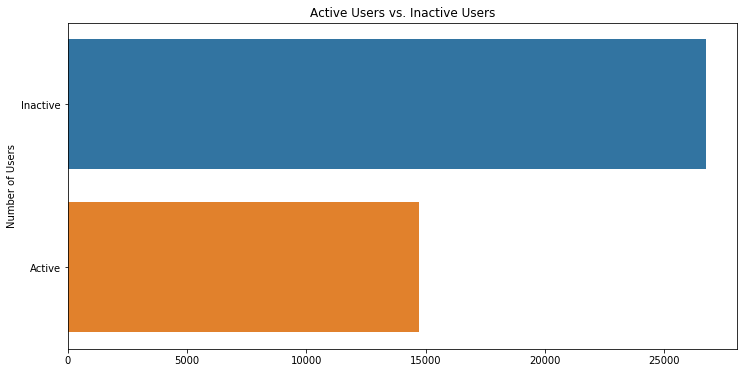

In [24]:
#plot active vs. inactive users
f, axes = plt.subplots(figsize=(12,6))
ax = sns.countplot(y=df["active"])
ax.set(title="Active Users vs. Inactive Users", \
       xlabel="", ylabel="Number of Users")
ax.set_yticklabels(["Inactive", "Active"])
plt.show()

/Users/kellipeluso/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Logins by Month')

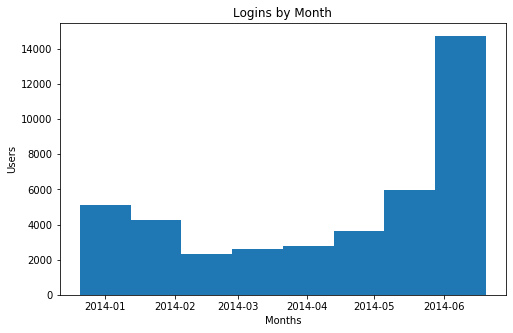

In [25]:
fig = plt.figure(figsize=(8,5))
plt.hist(df['last_trip_date'], bins=8, align='left')
plt.xlabel('Months')
plt.ylabel('Users')
plt.title('Logins by Month')

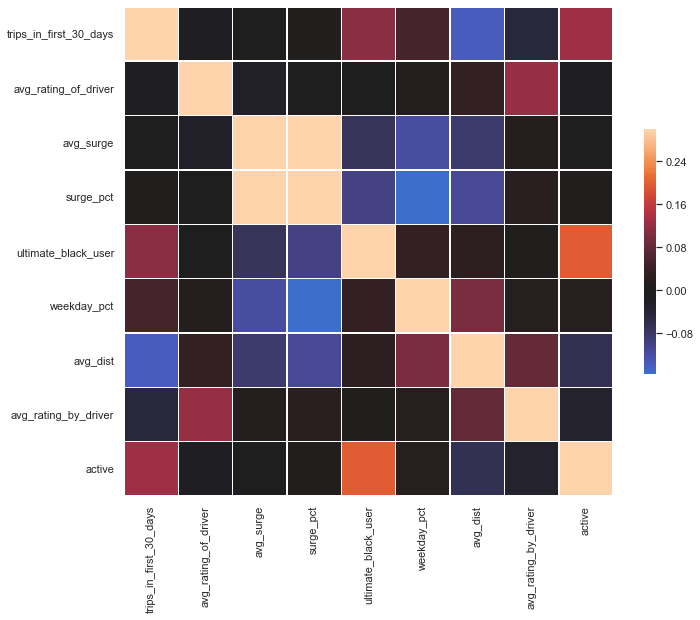

In [26]:
#plot correlation matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
#6 month user retention
from datetime import timedelta
retained_6 = lambda row: 1 if \
                      row["last_trip_date"] - row["signup_date"] \
                      > timedelta(days=30*5) \
                      else 0

df["retained_6"] = df.apply(retained_6, axis=1)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,retained_6
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,0


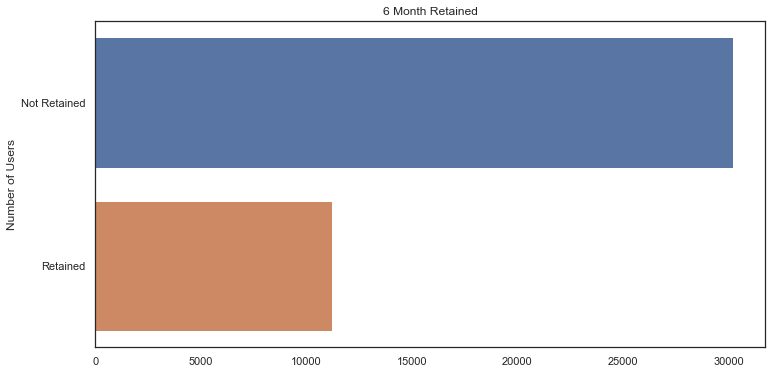

In [28]:
#plot 6 month retained vs. not
f, axes = plt.subplots(figsize=(12,6))
ax = sns.countplot(y=df["retained_6"])
ax.set(title="6 Month Retained", \
       xlabel="", ylabel="Number of Users")
ax.set_yticklabels(["Not Retained", "Retained"])
plt.show()

In [29]:
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41445 entries, 0 to 41444
Data columns (total 14 columns):
city                      41445 non-null object
trips_in_first_30_days    41445 non-null int64
signup_date               41445 non-null datetime64[ns]
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null object
surge_pct                 41445 non-null float64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
active                    41445 non-null int64
retained_6                41445 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(3), object(2)
memory usage: 4.2+ MB


In [31]:
#preprocessing
df['ultimate_black_user'] = df['ultimate_black_user'].map({False:0, True:1}).astype('category')
df['active'] = df['active'].astype('category')
df.drop(['last_trip_date'], axis=1, inplace = True)
df.drop(['signup_date'], axis=1, inplace = True)
df.drop(['retained_6'], axis = 1, inplace = True)

In [32]:
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0


In [33]:
#One hot encoding categoricals
c_data = df.loc[:,["city", "phone", "ultimate_black_user"]]
encoder = OneHotEncoder(categories="auto", sparse=False, drop='first')
enc_c_data = pd.DataFrame(encoder.fit_transform(c_data))
enc_c_data.columns = encoder.get_feature_names()
df_model =df.drop(["city", "phone", "ultimate_black_user"], axis=1)
df_model = df_model.join(enc_c_data, how="left")
df_model.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,x0_King's Landing,x0_Winterfell,x1_iPhone,x2_1
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1.0,0.0,1.0,1.0
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0.0,0.0,0.0,0.0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0.0,0.0,1.0,0.0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1.0,0.0,1.0,1.0
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0.0,1.0,0.0,0.0


In [34]:
df_model.reindex()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,x0_King's Landing,x0_Winterfell,x1_iPhone,x2_1
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1.0,0.0,1.0,1.0
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0.0,0.0,0.0,0.0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0.0,0.0,1.0,0.0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1.0,0.0,1.0,1.0
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41440,3,4.8,1.11,11.1,55.6,2.53,4.7,0,0.0,0.0,1.0,1.0
41441,1,4.6,1.44,37.5,25.0,2.25,4.5,0,0.0,0.0,1.0,0.0
41442,0,5.0,1.00,0.0,100.0,5.63,4.2,1,1.0,0.0,1.0,0.0
41443,0,5.0,1.00,0.0,100.0,3.86,5.0,0,0.0,1.0,0.0,1.0


In [35]:
X = df_model.drop('active',axis=1)
y = df_model['active']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [36]:
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

#fit random forest classifier
rf = RandomForestClassifier(criterion='gini', class_weight='balanced', n_jobs=-1)

K_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1220)
scorer = make_scorer(roc_auc_score, greater_is_better = True)
param_grid = {'n_estimators' : [40, 50, 60], 'min_samples_split' : [2, 3, 4], 
              'max_depth' : [4, 7, 10]}

#Setup the Gridsearch
rf_cv = GridSearchCV(rf, param_grid, cv=K_fold, scoring=scorer, verbose=1)

#Fit the data
rf_cv.fit(X_train, y_train)

#Print out the best model
print('Best RF Params: {}'.format(rf_cv.best_params_))
print('Best RF Score : %f' % rf_cv.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.3min finished


Best RF Params: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 60}
Best RF Score : 0.743169


Confusion matrix, without normalization
[[5868 2074]
 [1171 3321]]
Normalized confusion matrix
[[0.73885671 0.26114329]
 [0.26068566 0.73931434]]


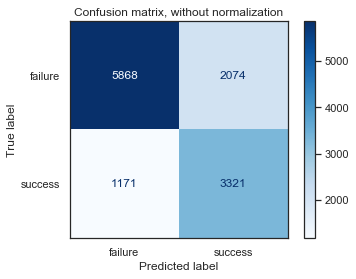

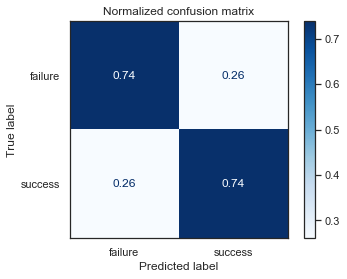

In [37]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['failure','success']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf_cv, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [38]:
#refit with best params
rf_best = RandomForestClassifier(criterion='gini', class_weight='balanced', n_jobs=-1, 
                                 n_estimators=rf_cv.best_params_['n_estimators'],
                                 min_samples_split=rf_cv.best_params_['min_samples_split'], 
                                 max_depth=rf_cv.best_params_['max_depth'])

rf_best.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=3, n_estimators=60, n_jobs=-1)

In [39]:
def get_scores(model, name='unk', score=roc_auc_score):
    pred = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:,1]
    auc = score(y_test, pred_prob)
    cv_score = cross_val_score(model, X_test, y_test, cv=K_fold, scoring=scorer)
    mean_cv = cv_score.mean()
    std_cv = cv_score.std()
    model_score = pd.DataFrame(columns=['Model', 'Test score', 'CV score'])
    model_score.loc[0] = [name, auc, mean_cv]
    model_score.set_index('Model', inplace=True)
    print(model_score)

In [40]:
get_scores(rf_best, 'RF')

       Test score  CV score
Model                      
RF       0.817159  0.735086


Confusion matrix, without normalization
[[5888 2054]
 [1154 3338]]
Normalized confusion matrix
[[0.74137497 0.25862503]
 [0.25690116 0.74309884]]


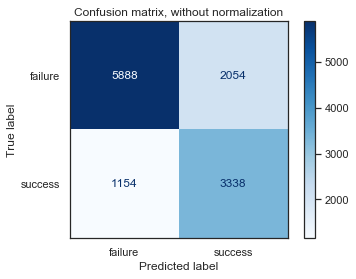

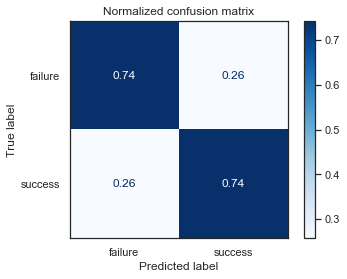

In [41]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ['failure','success']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf_best, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

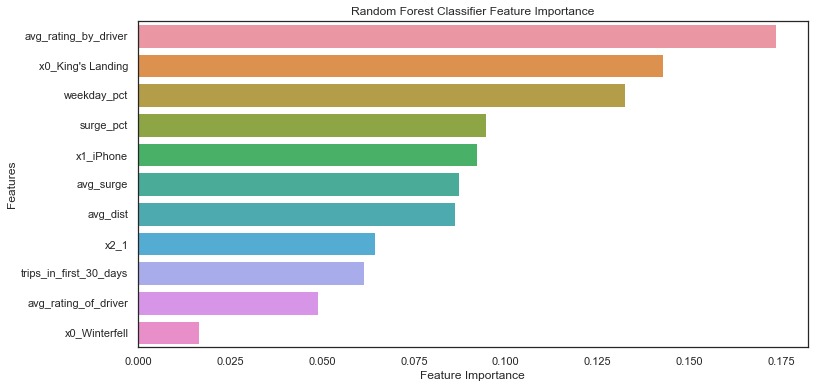

Feature Importance
                   Feature  Importance
6     avg_rating_by_driver    0.173394
7        x0_King's Landing    0.142862
4              weekday_pct    0.132297
3                surge_pct    0.094501
9                x1_iPhone    0.092292
2                avg_surge    0.087239
5                 avg_dist    0.086185
10                    x2_1    0.064438
0   trips_in_first_30_days    0.061395
1     avg_rating_of_driver    0.048862
8            x0_Winterfell    0.016535


In [42]:
#most important features
features = list(X.columns)
rf_best_feats = pd.DataFrame({'Feature': features,
                   'Importance': rf_best.feature_importances_}).\
                    sort_values('Importance', ascending = False)
fig=plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'Importance', y = 'Feature', data = rf_best_feats)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Feature Importance')
plt.show()
print('\033[1m' + "Feature Importance" + '\033[0m')
print(rf_best_feats)